In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statistics

In [11]:
import pandas as pd
import requests
from io import StringIO

# URL of the CSV file
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Fetch the data using requests
response = requests.get(URL)
response.raise_for_status()  # Raise an error for bad responses

# Convert the fetched data to a StringIO object
boston_url = StringIO(response.text)

# Read the CSV file into a DataFrame
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the DataFrame
print(boston_df.head())



   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [12]:

boston_df.head(10)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [ ]:
CRIM: Crime rate per capita by town.

ZN: Proportion of residential land zoned for lots larger than 25,000 sq. ft.

INDUS: Proportion of land allocated to non-retail business in each town.

CHAS: Dummy variable indicating proximity to the Charles River (1 if the tract borders the river, 0 otherwise).

NOX: Concentration of nitric oxides (measured in parts per 10 million).

RM: Average number of rooms per dwelling.

AGE: Proportion of homes built before 1940.

DIS: Weighted distances to five major Boston employment centers.

RAD: Accessibility index to radial highways.

TAX: Full-value property tax rate per $10,000.

PTRATIO: Pupil-to-teacher ratio by town.

LSTAT: Percentage of the population with a lower socioeconomic status.

MEDV: Median value of owner-occupied homes, expressed in thousands of dollars.

In [ ]:
Task 2: Generate Descriptive Statistics and Visualizations
Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

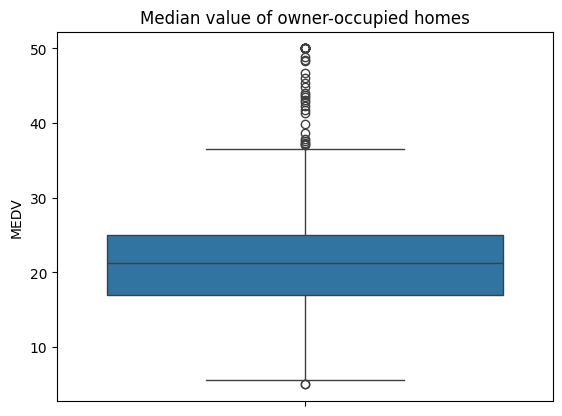

In [13]:

ax1 = sns.boxplot (y = "MEDV", data=boston_df)
ax1.set_title('Median value of owner-occupied homes')

In [ ]:
Task 2.2: Provide a bar plot for the Charles river variable


Text(0.5, 1.0, 'Charles river variable')

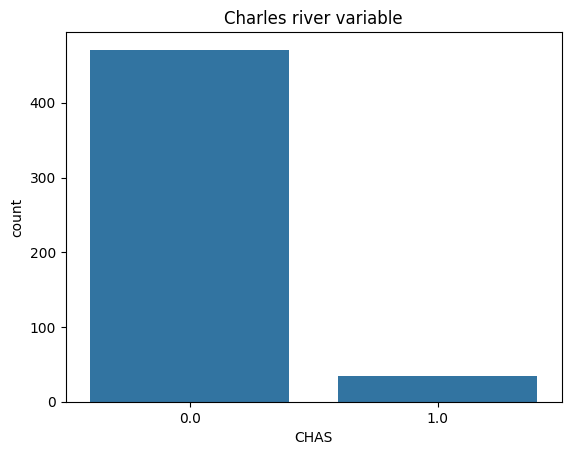

In [14]:
ax2 = sns.countplot (x="CHAS", data = boston_df)
ax2.set_title('Charles river variable')

In [ ]:
Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'MEDV variable vs the AGE variable.')]

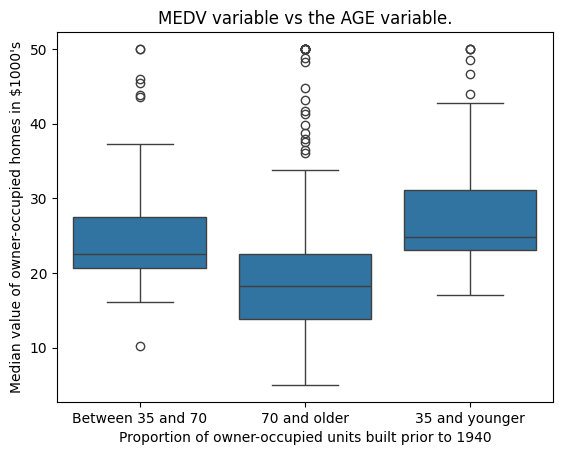

In [15]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

ax3 = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
ax3.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "MEDV variable vs the AGE variable.")

In [ ]:
Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


[Text(0.5, 0, 'Nitric oxides concentration (parts per 10 million)'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'MEDV variable vs the AGE variable.')]

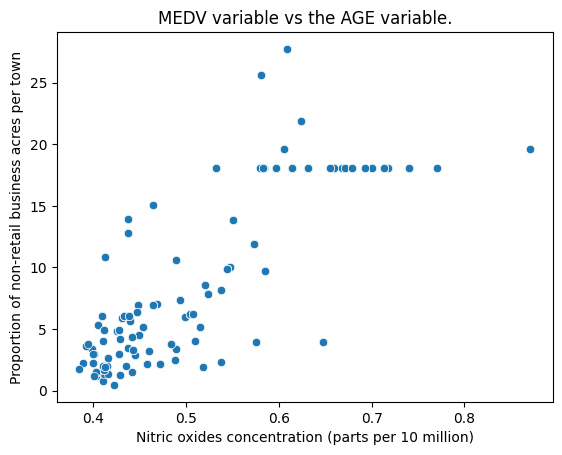

In [16]:
ax4 = sns.scatterplot (x= "NOX", y= "INDUS", data = boston_df)
ax4.set(xlabel = "Nitric oxides concentration (parts per 10 million)"
           , ylabel = "Proportion of non-retail business acres per town"
           , title = "MEDV variable vs the AGE variable.")

In [ ]:
Task 2.5: Create a histogram for the pupil to teacher ratio variable


[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

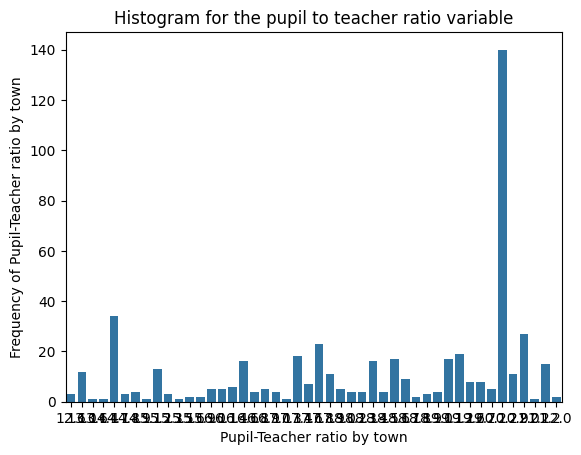

In [17]:
ax5 = sns.countplot(x = 'PTRATIO', data = boston_df)
ax5.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

In [ ]:
Task 3: Use the appropriate tests to answer the questions provided.


In [ ]:
Task3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
State the Hypotheses:

H0 = there is no significant difference in the median value of houses bounded by the Charles river

H1 = there is a significant difference in the median value of houses bounded by the Charles river

In [18]:
Not_bounded = boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'Not Bounded'
bounded = boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'Bounded'

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'Not Bounded']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'Bounded']['MEDV'], equal_var = True)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

In [ ]:
Task 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
State the Hypotheses:

H0: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes

H1: Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [20]:
X = boston_df ['DIS']
y = boston_df ['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        13:17:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Conclusion: Like the t-test, the p-value is less than the alpha level = 0.05, so we reject the null hypothesis as there is evidence that there is an impact in the median value of owner occupied homes.
